## organising dataset by making image path and label column in one csv file

In [12]:
import os
import pandas as pd

# Main folder where the images are stored
dataset_folder = 'original lung cancer dataset'  # Correct folder name
output_csv = 'dataset_labels.csv'

# Subfolders representing each category
categories = ['Malignant cases', 'Bengin cases', 'Normal cases']

# List to hold image paths and labels
data = []

# Loop through each category folder and collect image paths and labels
for category in categories:
    folder_path = os.path.join(dataset_folder, category)  # Path to the category folder
    if os.path.exists(folder_path):  # Check if the folder exists
        for filename in os.listdir(folder_path):
            # Check if the file is an image
            if filename.endswith(('.jpg', '.jpeg', '.png')):
                # Construct the relative image path
                
                image_path = os.path.join(dataset_folder, category, filename)
                # Label is simply the category name
                label = category.split()[0].capitalize()  # Extracts 'Malignant', 'Benign', 'Normal'
                # Append the image path and label to the data list
                data.append([image_path, label])

# Convert data to a DataFrame and save to CSV
df = pd.DataFrame(data, columns=['image_path', 'label'])
df.to_csv(output_csv, index=False)

print(f"CSV file '{output_csv}' created successfully with {len(data)} entries.")

CSV file 'dataset_labels.csv' created successfully with 1097 entries.


## display 5 rows in dataset

In [13]:
df.head(5)

,image_path,label
0,original lung cancer dataset\Malignant cases\M...,Malignant
1,original lung cancer dataset\Malignant cases\M...,Malignant
2,original lung cancer dataset\Malignant cases\M...,Malignant
3,original lung cancer dataset\Malignant cases\M...,Malignant
4,original lung cancer dataset\Malignant cases\M...,Malignant


##  display last 5 rows in dataset

In [14]:
df.tail(5)

,image_path,label
1092,original lung cancer dataset\Normal cases\Norm...,Normal
1093,original lung cancer dataset\Normal cases\Norm...,Normal
1094,original lung cancer dataset\Normal cases\Norm...,Normal
1095,original lung cancer dataset\Normal cases\Norm...,Normal
1096,original lung cancer dataset\Normal cases\Norm...,Normal


## display image by loading image from image_path using matplotlib librabry

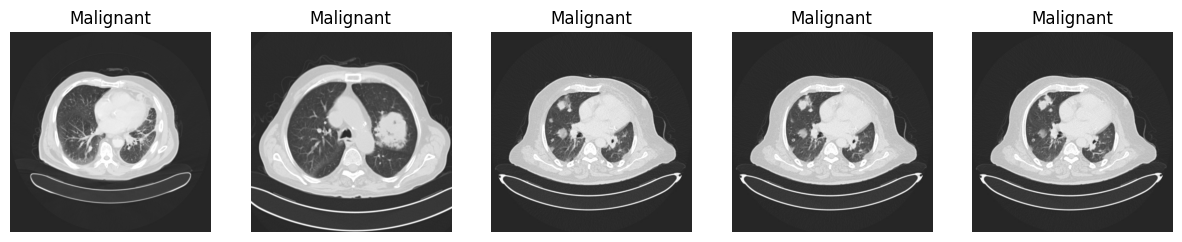

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2

# Path to the CSV file
csv_file = 'dataset_labels.csv'

# Load the CSV file
df = pd.read_csv(csv_file)

# Display a few images and their labels
def display_images(df, num_images=5):
    plt.figure(figsize=(15, 15))  # Set the figure size

    for i in range(num_images):
        image_path = df.iloc[i]['image_path']  # Get the image path
        label = df.iloc[i]['label']  # Get the label
        
        # Read the image using OpenCV
        image = cv2.imread(image_path)
        
        if image is not None:  # Ensure the image is loaded
            # Convert BGR (OpenCV format) to RGB for displaying with Matplotlib
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
            # Create a subplot for the image
            plt.subplot(1, num_images, i + 1)
            plt.imshow(image)
            plt.axis('off')  # Hide the axes
            plt.title(label)  # Set the title as the label
        else:
            print(f"Could not load image: {image_path}")
    
    plt.show()

# Call the function to display images
display_images(df, num_images=5)  # Change num_images to display more/less


# checking for correctness in organising dataset 
## checking whether path is correct or not

In [9]:
 import os

missing_files = [path for path in df['image_path'] if not os.path.exists(path)]
if missing_files:
    print(f"Missing files: {missing_files}")
else:
    print("All image paths are valid!")


All image paths are valid!


# checking for repeatation of same file

In [10]:
if df['image_path'].duplicated().sum() == 0:
    print("No duplicate image paths!")


No duplicate image paths!
